# Análise COVID-19
---

### 1. Importando as bibliotecas

In [391]:
# Bibliotecas para manipulação de dados
import pandas as pd
from datetime import datetime 
import numpy as np

# Bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Bibliotecas para modelagem
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from pmdarima.arima import auto_arima

# Configurações
pd.options.display.float_format = "{:,.2f}".format
plt.style.use("seaborn")

### 2. Carregando os DataSet

In [350]:
df_world = pd.read_csv("worldometer_data.csv")
df_complete = pd.read_csv("covid_19_clean_complete.csv")
df_daywise = pd.read_csv("day_wise.csv")
df_daywise['Date'] = pd.to_datetime(df_daywise['Date'])

In [103]:
df_world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,"331,198,130.00",5032179,NaN,"162,804.00",NaN,"2,576,668.00",NaN,"2,292,707.00","18,296.00","15,194.00",492.00,"63,139,605.00","190,640.00",Americas
1,Brazil,South America,"212,710,692.00",2917562,NaN,"98,644.00",NaN,"2,047,660.00",NaN,"771,258.00","8,318.00","13,716.00",464.00,"13,206,188.00","62,085.00",Americas
2,India,Asia,"1,381,344,997.00",2025409,NaN,"41,638.00",NaN,"1,377,384.00",NaN,"606,387.00","8,944.00","1,466.00",30.00,"22,149,351.00","16,035.00",South-EastAsia
3,Russia,Europe,"145,940,924.00",871894,NaN,"14,606.00",NaN,"676,357.00",NaN,"180,931.00","2,300.00","5,974.00",100.00,"29,716,907.00","203,623.00",Europe
4,South Africa,Africa,"59,381,566.00",538184,NaN,"9,604.00",NaN,"387,316.00",NaN,"141,264.00",539.00,"9,063.00",162.00,"3,149,807.00","53,044.00",Africa


In [351]:
df_daywise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [352]:
Data_Inicio_Daywise = df_daywise["Date"].min()
Data_Fim_Daywise = df_daywise["Date"].max()
print(Data_Inicio_Daywise,Data_Fim_Daywise)

2020-01-22 00:00:00 2020-07-27 00:00:00


### 3. Primeiras análises

#### 3.1 Casos confirmados

In [353]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise['Date'], y=df_daywise['Confirmed']))
fig.update_layout(title="Casos de COVID-19 confirmados no mundo (22 Jan - 27 Julho)",
                  xaxis_title = "Tempo (Dias)",
                  yaxis_title = "Casos Confirmados"

)
fig.show()

#### 3.2 Número de mortes

In [354]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise['Date'], y=df_daywise['Deaths'],line={'color':'red'}))
fig.update_layout(title="Mortes por COVID-19 no mundo (22 Jan - 27 Julho)",
                  xaxis_title = "Tempo (Dias)",
                  yaxis_title = "Mortes")
fig.show()

#### 3.3 Casos Recuperados

In [355]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise['Date'], y=df_daywise['Recovered'],line={'color':'black'}))
fig.update_layout(title="Casos de COVID-19 recuperados no mundo (22 Jan - 27 Julho)",
                  xaxis_title = "Tempo (Dias)",
                  yaxis_title = "Número de recuperados"
)
fig.show()

#### 3.4 Casos ativos

In [356]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise['Date'], y=df_daywise['Active'],line={'color':'orange'}))
fig.update_layout(title="Casos ativos de COVID-19 no mundo (22 Jan - 27 Julho)",
                  xaxis_title = "Tempo (Dias)",
                  yaxis_title = "Número de casos ativos"
)
fig.show()

#### 3.5 Países com maior números de casos

In [357]:
top5_TotalCases = df_world.loc[df_world["Population"] > 1000000]
top5_TotalCases = top5_TotalCases[["Country/Region","TotalCases"]].nlargest(10,"TotalCases")
fig = px.bar(x=top5_TotalCases["Country/Region"],
            y=top5_TotalCases["TotalCases"])
fig.update_layout(title="Países com o maior número de casos (Com população maior que 1.000.000 de habitantes)",
                  xaxis_title = "Países",
                  yaxis_title = "Casos totais"
)
fig.show()

#### 3.6 Países com maior números de mortes 

In [358]:
top5_Deaths = df_world.loc[df_world["Population"] > 1000000]
top5_Deaths = top5_Deaths[["Country/Region","TotalDeaths"]].nlargest(10,"TotalDeaths")
fig = px.bar(x=top5_Deaths["Country/Region"],
            y=top5_Deaths["TotalDeaths"])
fig.update_layout(title="Países com o maior número de mortes (Com população maior que 1.000.000 de habitantes)",
                  xaxis_title = "Países",
                  yaxis_title = "Mortes")
fig.show()

#### 3.7 Continentes com maior números de casos

In [359]:
regions = df_world[["TotalCases","TotalDeaths","WHO Region"]]
#regions["WHO Region"].unique()

fig = px.bar(x=regions["WHO Region"].unique()[:6],
            y=regions.groupby("WHO Region")["TotalCases"].sum().sort_values(ascending=False))
fig.update_layout(title="Continentes com maior número de casos",
                  xaxis_title = "Continentes",
                  yaxis_title = "Casos Totais")
fig.show()

### 4. Predições

#### 4.1 Previsão utilizando Regressão Linear

#### 4.1.1 Separando as colunas de interesse para realizar as predições

In [370]:
Confirmados = df_daywise["Confirmed"]
Confirmados.index = df_daywise["Date"]
Confirmados

Date
2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-07-23    15510481
2020-07-24    15791645
2020-07-25    16047190
2020-07-26    16251796
2020-07-27    16480485
Name: Confirmed, Length: 188, dtype: int64

#### 4.1.2 Preparação das datas para as predições

In [372]:
dates = Confirmados.index
days_future = 14
future_forecast = np.array([i for i in range(len(dates)+days_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-days_future]
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)

#### 4.1.3 Separação dos subconjuntos de treinamento e teste

In [385]:
X_train, X_test, y_train, y_test = train_test_split(days_since_1_22[50:],Confirmados[50:],
                                                   test_size=0.07,shuffle=False,random_state=9999)

#### 4.1.4 Ajustando o polinômio para o ajuste de curva

In [386]:
poly = PolynomialFeatures(degree=4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_future_forecast = poly.fit_transform(future_forecast)

#### 4.1.5 Implementação do modelo de regressão linear

In [387]:
linear_model = LinearRegression(normalize=True,fit_intercept=False)
linear_model.fit(poly_X_train,y_train)
linear_pred = linear_model.predict(poly_future_forecast)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





#### 4.1.6 Analise do modelo criado no conjunto de teste

In [388]:
test_linear_pred = linear_model.predict(poly_X_test)

#### 4.1.7 Métricas do modelo de Regressão Linear

In [389]:
r2 = r2_score(y_test,test_linear_pred)
print(f"Pontuação R2 do modelo:             {r2:.2f}")
MAE = mean_absolute_error(y_test,test_linear_pred)
print(f"Erro médio absoluto:                {MAE:.2f}")
MAPE = np.mean(np.abs((y_test - test_linear_pred)/y_test))*100
print(f"Erro Médio absoluto em porcentagem: {MAPE:.2f}")


Pontuação R2 do modelo:             0.79
Erro médio absoluto:                304522.52
Erro Médio absoluto em porcentagem: 1.95


#### 4.1.8 Gráfico da previsão realizada comparado com os casos confirmados

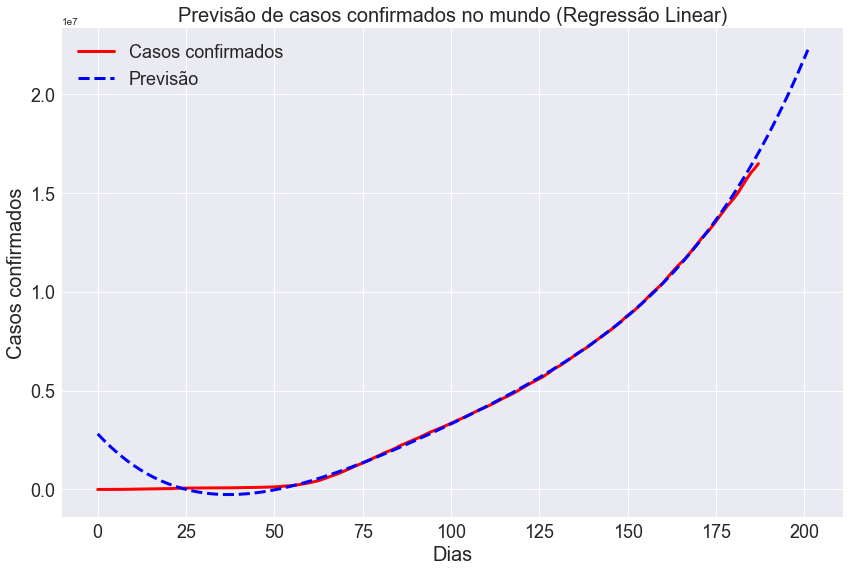

In [432]:
plt.figure(figsize=(14,9))
plt.plot(adjusted_dates,df_daywise["Confirmed"],color="red",linewidth=3)
plt.plot(future_forecast,linear_pred,linestyle="dashed",color="blue",linewidth=3)
plt.title("Previsão de casos confirmados no mundo (Regressão Linear)",size=20)
plt.xlabel("Dias",size=20)
plt.ylabel("Casos confirmados",size=20)
plt.legend(["Casos confirmados","Previsão"],prop={'size':18})
plt.xticks(size=18)
plt.yticks(size=18)
plt.show()

#### 4.2 Previsão utilizando ARIMA

#### 4.2.1 Treinamento do modelo utilizando os casos confirmados até 13/07

In [433]:
modelo_arima = auto_arima(Confirmados[:174])

#### 4.2.2 Métricas do modelo ARIMA

In [434]:
r2 = r2_score(Confirmados[174:],modelo_arima.predict(14))
print(f"Pontuação R2 do modelo:             {r2:.2f}")
MAE = mean_absolute_error(Confirmados[174:],modelo_arima.predict(14))
print(f"Erro médio absoluto:                {MAE:.2f}")
MAPE = np.mean(np.abs(( Confirmados[174:] - modelo_arima.predict(14))/Confirmados[174:]))*100
print(f"Erro Médio absoluto em porcentagem: {MAPE:.2f}")

Pontuação R2 do modelo:             0.98
Erro médio absoluto:                109872.90
Erro Médio absoluto em porcentagem: 0.70


#### 4.2.3 Gráfico da previsão realizada 

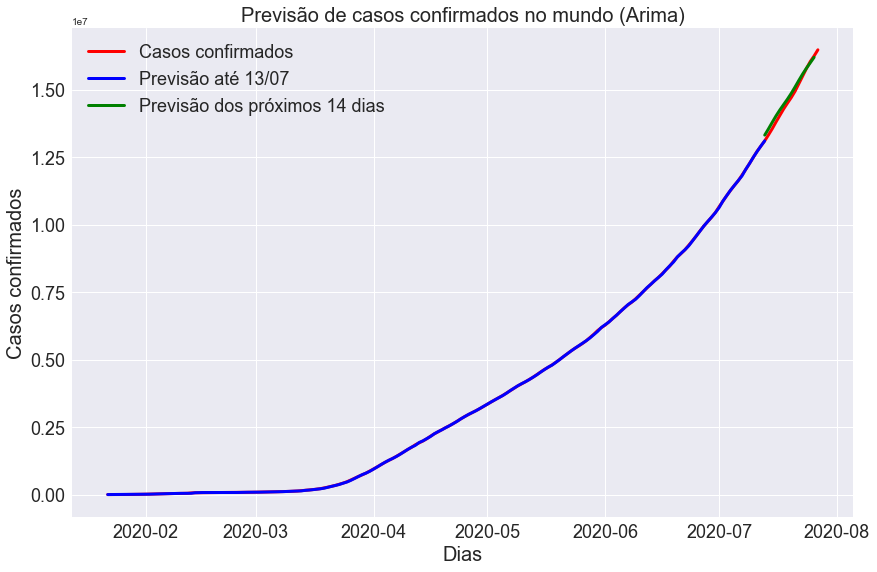

In [448]:
plt.figure(figsize=(14,9))
plt.plot(Confirmados.index,Confirmados,color='red',linewidth=3)
plt.plot(Confirmados.index[:174],modelo_arima.predict_in_sample(),color='blue',linewidth=3)
plt.plot(pd.date_range('2020-07-13','2020-07-26'), modelo_arima.predict(14),color='green',linewidth=3)
plt.title("Previsão de casos confirmados no mundo (Arima)",size=20)
plt.xlabel("Dias",size=20)
plt.ylabel("Casos confirmados",size=20)
plt.legend(["Casos confirmados","Previsão até 13/07","Previsão dos próximos 14 dias"],prop={'size':18})
plt.xticks(size=18)
plt.yticks(size=18)
plt.show()

In [447]:
#fig = go.Figure(go.Scatter(
#    x = Confirmados.index, y = Confirmados, 
#    name = "Casos confirmados"))
#fig.add_trace(go.Scatter(
#    x = Confirmados.index, y = modelo_arima.predict_in_sample(), 
#    name = "Previsão até 13/07"))
#fig.add_trace(go.Scatter(
#    x = pd.date_range('2020-07-13','2020-07-27'), y = modelo_arima.predict(14), 
#    name = "Previsão dos próximos 14 dias",  mode = "lines"))
#fig.update_layout(title="Previsão de casos confirmados no mundo (ARIMA)")
#fig.show()

### 5. Conclusões

#### - Foram desenvolvido dois modelos de previsão do número de casos confirmados de COVID-19 para os próximos 14 dias a partir do dia 13/07 de 2020.
#### - O primeiro modelo utilizando Regressão Linear com polinômios de quarto grau retornou uma pontuação R2 de 0.79 e Erro médio absoluto de 304522.52 enquanto que o segundo modelo utilizando ARIMA retornou uma pontuação R2 de 0.98 e Erro médio absoluto de 109872.90.
#### - Tomando essas duas métricas como base, é possível inferir que o modelo utilizando ARIMA obteve um melhor resultado nas previsões, visto que o mesmo é particularmente ideal para previsões de Séries Temporais.